## Modelo Series Tiempo. ARIMA

### Librerias a utilizar

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

### Paso 1. Lectura del conjunto de datos

In [2]:
data_v=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

In [3]:
data_v.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
data_v.tail()

,date,sales
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214
365,2023-09-03 17:10:08.079328,1000.482785


In [5]:
data_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
data_v['fecha'] = pd.to_datetime(data_v['date'], format='%Y-%m-%d %H:%M:%S.%f').dt.date
data_v['fecha']=pd.to_datetime(data_v['fecha'])
data_v.info()
data_v.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    object        
 1   sales   366 non-null    float64       
 2   fecha   366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.7+ KB


,date,sales,fecha
0,2022-09-03 17:10:08.079328,55.292157,2022-09-03
1,2022-09-04 17:10:08.079328,53.803211,2022-09-04
2,2022-09-05 17:10:08.079328,58.141693,2022-09-05
3,2022-09-06 17:10:08.079328,64.530899,2022-09-06
4,2022-09-07 17:10:08.079328,66.013633,2022-09-07


In [7]:
col=['fecha','sales']
ts=data_v[col]
ts=ts.set_index('fecha')
ts.info()
ts.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-09-03 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


,sales
fecha,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633


### Paso 2. Análisis de la serie temporal

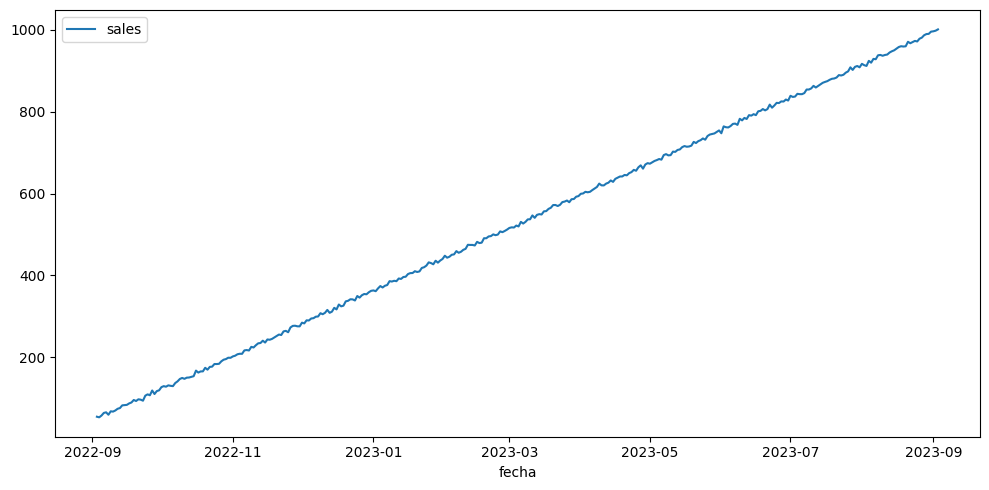

In [8]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

Para analizar una serie temporal, como vimos en la teoría, debemos estudiar varios parámetros:


- **Tensor de la serie temporal**. En este caso el tensor de la serie temporal sería una matriz de shape (366, 1), donde cada fila representa un día y la columna única representa el valor de ventas diarias para ese día.

- **Tendencia**: Se aprecia una tendencia ascendente, lo que se evidencia por el incremento de las ventas desde finales del 2022 hasta finales del 2023, de un 1415%.

- **Estacionalidad**: No se observa estacionalidad en los datos, las ventas van en aumento todos los meses.

- **Variabilidad o presencia de ruido**: No se observan puntos de variabilidad en la serie temporal.

- **Puntos atípicos** (*Outliers*): No se aprecian outliers en la serie temporal.

- **Puntos de inflexión**: El grafico no muestra puntos de inflexion aparentes, el crecimiento de las ventas se produce casi a una tasa constante.

A través de un análisis visual podríamos ser capaces de estimar estas métricas a ojo, pero siempre es mejor orientar el análisis a los datos matemáticos. Para la labor de realizar predicciones sobre series temporales y analizarlas, nos apoyaremos en la librería `statsmodels`.

#### Descomposición de la serie

In [9]:
periodo=7
decomposition = seasonal_decompose(ts,period=periodo)
decomposition

#### Análisis de la tendencia

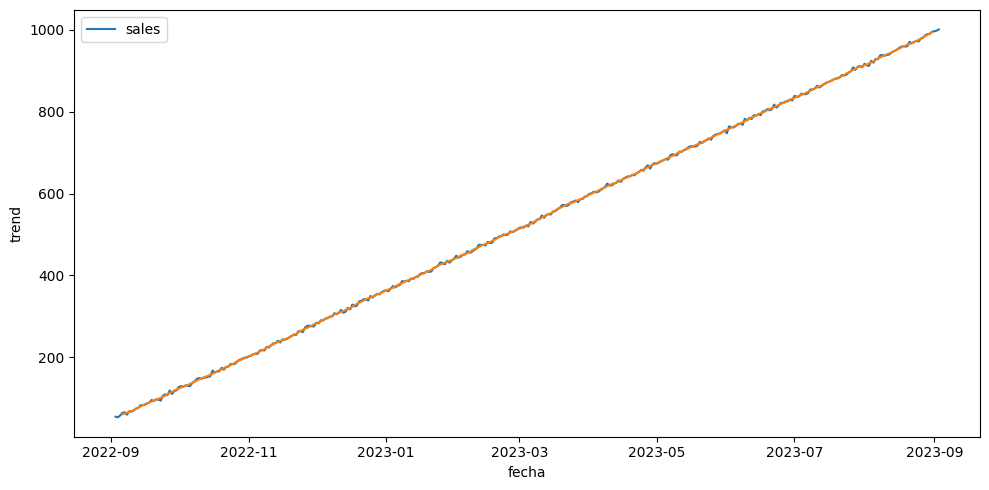

In [10]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Se confirma la tendencia ascendente en este conjunto de datos.

#### Análisis de la estacionalidad

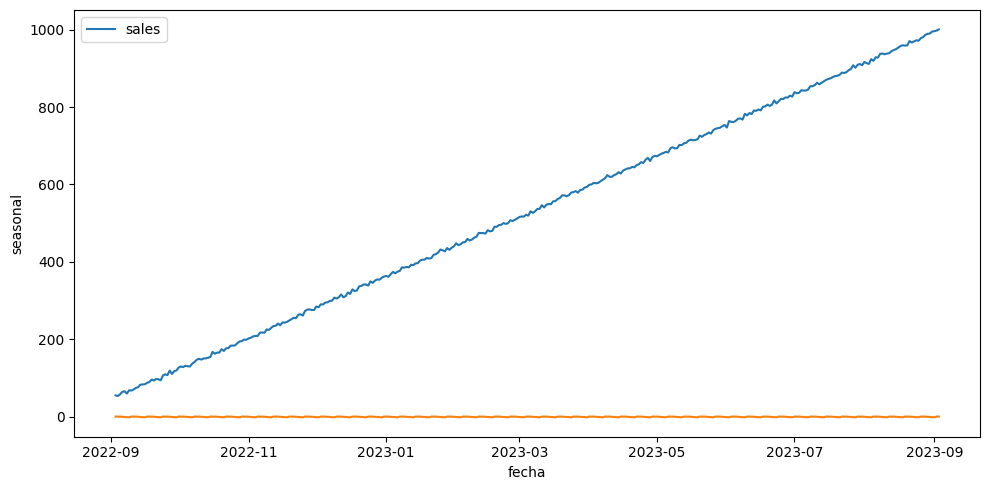

In [11]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

No existe estacionalidad en el conjunto de datos.

Para evaluar la estacionalidad de la serie temporal podemos aplicar la llamada **Prueba de Dickey-Fuller** (*Dickey-Fuller test*), que es un contraste de hipótesis en el que la hipótesis nula es que la serie es estacionaria, y la alternativa, que es no estacionaria:


In [12]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Aquí podemos ver que el `p-value` es mayor a 0.05, esto significa que nuestra hipótesis nula será rechazada y tomaremos esta serie como no estacionaria.

#### Análisis de la variabilidad

La variabilidad implica el estudio de los residuos: que es cómo fluctúan los datos una vez se ha estudiado la tendencia y la estacionalidad. Para acceder a su información recurrimos al componente `resid` del resultado `decomposition`.

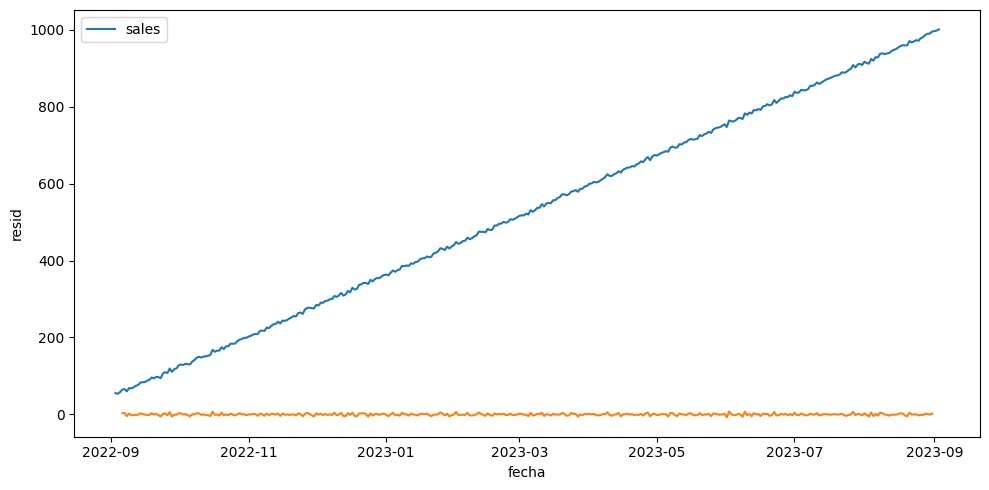

In [13]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Se puede observar que los residuos son minimos y se mantienen constante en el tiempo, lo que supone una baja variabilidad.

#### Análisis de la autocorrelación


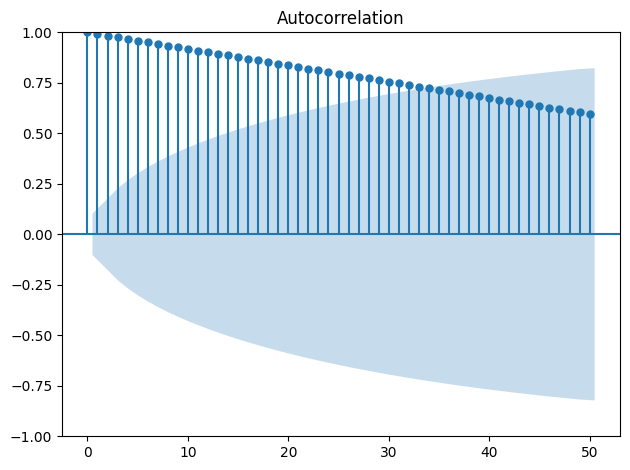

In [14]:
plot_acf(ts,lags=50)

plt.tight_layout()

plt.show()

### Paso 3: Entrenamiento del modelo


#### Transformacion de la data en estacionaria

La opción shuffle=False es importante para mantener la ordenación temporal de la serie, para no mezclar los datos en una serie temporal.

In [15]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

Ahora la serie se ha vuelto estacionaria (test Statistic es menor que los valores criticos y el p-value es menor a 0.05) y podemos aplicar el método ARIMA automático.

#### Dividiendo el conjunto en train y test.

La opción shuffle=False es importante para mantener la ordenación temporal de la serie, para no mezclar los datos en una serie temporal.

In [16]:
from sklearn.model_selection import train_test_split

# Asigna la serie temporal a la variable X
X = ts_stationary

# Divide la serie temporal en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(X))  # 80% para entrenamiento
test_size = len(X) - train_size  # 20% para prueba

X_train, X_test = train_test_split(X, train_size=train_size, test_size=test_size, shuffle=False)
X_train.head()

,sales
fecha,
2022-09-04,-1.488946
2022-09-05,4.338482
2022-09-06,6.389205
2022-09-07,1.482734
2022-09-08,-5.931768


In [17]:
X_test.to_csv('X_test.csv')


In [18]:
X_test.head()

,sales
fecha,
2023-06-23,-7.489058
2023-06-24,5.374938
2023-06-25,6.421263
2023-06-26,-0.514759
2023-06-27,4.058426


In [19]:
model = auto_arima(X_train, seasonal = True, trace = True, m = periodo)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=1487.320, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1683.985, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1585.188, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1481.310, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1773.606, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=1484.235, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=1482.284, Time=0.66 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=1481.869, Time=0.37 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=1480.664, Time=0.51 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=1482.119, Time=0.70 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=1479.371, Time=0.88 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=1686.958, Time=0.26 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=1

Como podemos ver, la función hace una búsqueda en el espacio de soluciones posibles para estimar los mejores parámetros. En este caso tendríamos un $ARIMA(0, 0, 1)$.

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  292
Model:             SARIMAX(0, 0, 1)x(2, 0, 1, 7)   Log Likelihood                -733.686
Date:                           Mon, 15 Jul 2024   AIC                           1479.371
Time:                                   14:26:14   BIC                           1501.432
Sample:                               09-04-2022   HQIC                          1488.208
                                    - 06-22-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5946      0.496      7.247      0.000       2.622       4.567
ma.L1         -0.9874      0.022    -45.863      0.000      -1.030      -0.945
ar.S.L7       -0.6109      0.168     -3.645      0.000      -0.939      -0.282
ar.S.L14       0.2286      0.059      3.869      0.000       0.113       0.344
ma.S.L7        0.7959      0.170      4.670      0.000       0.462       1.130
sigma2         8.7485      0.796     10.988      0.000       7.188      10.309
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.23   Prob(JB):                         0.42
Heteroskedasticity (H):               0.96   Skew:                             0.10
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Paso 4: Predicción del modelo


In [21]:
forecast = model.predict(73)
forecast.to_csv('forecast.csv')

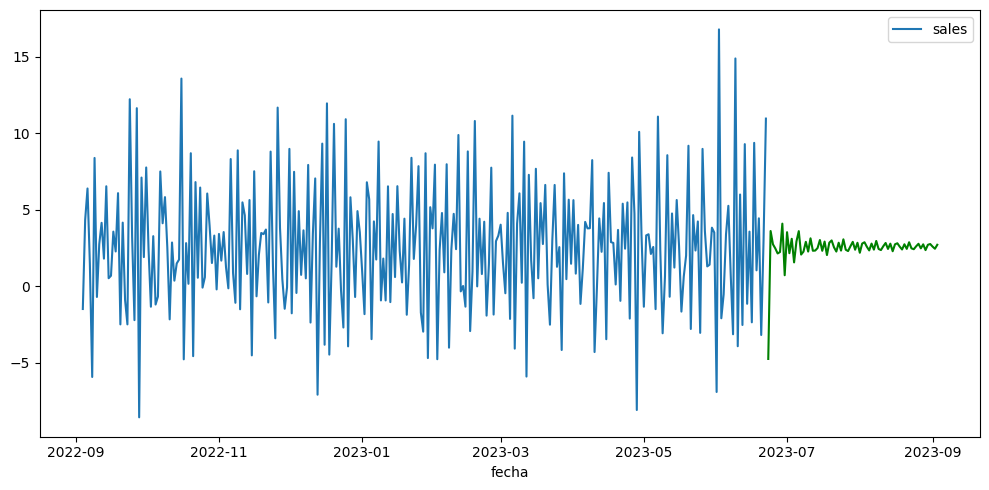

In [22]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = X_train)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

In [23]:
import numpy as np

y_true = np.array([X_test])  # array de valores reales
y_pred = np.array([forecast])  # array de valores predichos

mse = np.mean((y_true - y_pred) ** 2)
print("MSE:", mse)

raiz_mse = np.sqrt(mse)
print("Raiz_MSE:", raiz_mse)

mae = np.mean(np.abs(y_true - y_pred))
print("MAE:", mae)

MSE: 17.52246607520209
Raiz_MSE: 4.185984481003493
MAE: 3.211831713008353


#### Conclusiones

- En resumen, las métricas sugieren que el modelo ARIMA tiene un ajuste moderado a los datos, con un error promedio de aproximadamente 3-4 unidades. 

### Paso 5: Guardando el modelo

In [24]:
import joblib

# Guarda el modelo
joblib.dump(model, 'arima_model.joblib')

['arima_model.joblib']